<a href="https://colab.research.google.com/github/anushrijamar/Machine_learning/blob/main/naive_bayes_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
df=pd.read_csv('/content/Seed_Data.csv')
df.info
X=df.iloc[:,0:7]
Y=df.iloc[:,7]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=21)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy ",accuracy_score(y_pred,Y_test))

Accuracy  0.9285714285714286


Accuracy: 0.9523809523809523


<ipython-input-25-0039af3d70d8>:55: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train_pca[Y_train == j, 0], X_train_pca[Y_train == j, 1],


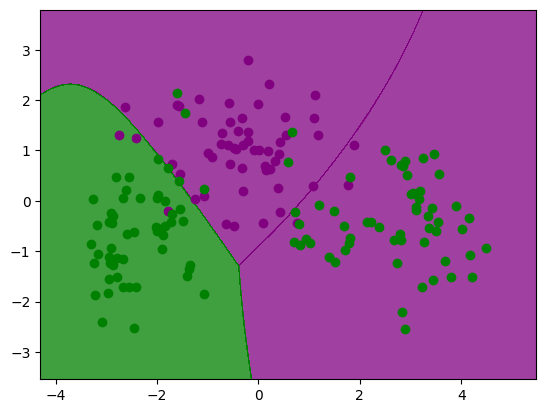

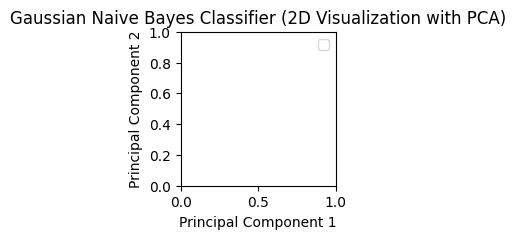

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

# Load your dataset
df = pd.read_csv('/content/Seed_Data.csv')

# Split the data into features (X) and target labels (Y)
X = df.iloc[:, 0:7]
Y = df.iloc[:, 7]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train_pca, Y_train)

# Make predictions
y_pred = clf.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy:", accuracy)

# Create a mesh grid of feature values for 2D visualization
x1, x2 = np.meshgrid(np.arange(start=X_train_pca[:, 0].min() - 1, stop=X_train_pca[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_train_pca[:, 1].min() - 1, stop=X_train_pca[:, 1].max() + 1, step=0.01))

# Use the classifier to make predictions on the mesh grid points
Z = clf.predict(np.array([x1.ravel(), x2.ravel()]).T)
Z = Z.reshape(x1.shape)

# Create a contour plot
plt.contourf(x1, x2, Z, alpha=0.75, cmap=ListedColormap(('purple', 'green')))

# Scatter plot for training points
for i, j in enumerate(np.unique(Y_train)):
    plt.scatter(X_train_pca[Y_train == j, 0], X_train_pca[Y_train == j, 1],
                c=ListedColormap(('purple', 'green'))(i), label=j)
plt.figure(figsize=(2, 2))
plt.title('Gaussian Naive Bayes Classifier (2D Visualization with PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
